Лабораторна робота №2 на тему: "EDA and Supervised Learning" Молодід Єгор ДА-02

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"C:\Users\starodubbb\Desktop\lab2\application_train.csv")
test = pd.read_csv(r"C:\Users\starodubbb\Desktop\lab2\application_test.csv")

In [3]:
print(train.shape)
train.sample(5)

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
237171      374708       0         Cash loans           M            Y  \
274092      417708       0         Cash loans           F            Y   
214110      348107       0         Cash loans           F            N   
163708      289772       0         Cash loans           F            N   
91614       206388       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
237171               N             0          180000.0    508495.5  \
274092               Y             0          337500.0   1125000.0   
214110               Y             0          157500.0    584766.0   
163708               N             0          135000.0    679500.0   
91614                Y             0          202500.0    450000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20   
237171      37345.5  ...                 0                0                0  \
274092      32895.0  ...                 0                0                0   
214110      25888.5  ...                 0                0                0   
163708      22455.0  ...                 0                0                0   
91614       29299.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
237171                0                        0.0                       0.0  \
274092                0                        0.0                       0.0   
214110                0                        0.0                       0.0   
163708                0                        0.0                       0.0   
91614                 0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
237171                         0.0                        0.0  \
274092                         0.0                        0.0   
214110                         0.0                        0.0   
163708                         0.0                        0.0   
91614                          NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
237171                        0.0                         2.0  
274092                        1.0                         5.0  
214110                        0.0                         2.0  
163708                        0.0                         1.0  
91614                         NaN                         NaN  

[5 rows x 122 columns]

In [4]:
print(test.shape)
test.sample(5)

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
40095      395328         Cash loans           F            N               Y  \
44016      420888         Cash loans           F            N               Y   
40520      398260         Cash loans           M            Y               Y   
20924      251795         Cash loans           F            N               Y   
34113      349013         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
40095             0          135000.0    315666.0      32476.5  \
44016             0          112500.0    512995.5      36612.0   
40520             0          135000.0    315000.0      21924.0   
20924             0          180000.0    729792.0      37390.5   
34113             0          112500.0    306000.0      24304.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19   
40095         292500.0  ...                0                0  \
44016         454500.0  ...                0                0   
40520         315000.0  ...                0                0   
20924         630000.0  ...                0                0   
34113         306000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR   
40095                0                0                        0.0  \
44016                0                0                        0.0   
40520                0                0                        0.0   
20924                0                0                        0.0   
34113                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
40095                        0.0                         0.0  \
44016                        0.0                         0.0   
40520                        0.0                         0.0   
20924                        0.0                         0.0   
34113                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT   
40095                        0.0                        0.0  \
44016                        0.0                        1.0   
40520                        0.0                        1.0   
20924                        0.0                        0.0   
34113                        0.0                        1.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
40095                         0.0  
44016                         3.0  
40520                         0.0  
20924                         0.0  
34113                         4.0  

[5 rows x 121 columns]

In [5]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   
count  307511.000000  307511.000000  307511.000000      3.075110e+05  \
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   
count  3.075110e+05  307499.000000     3.072330e+05  \
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...   
count               307511.000000  307511.000000  307511.000000  ...  \
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21   
count     307511.000000     307511.000000     307511.000000     307511.000000  \
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY   
count               265992.000000              265992.000000  \
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
count               265992.000000              265992.000000  \
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [6]:
train.describe(include="all")

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER   
count   307511.000000  307511.000000             307511      307511  \
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL   
count        307511          307511  307511.000000      3.075110e+05  \
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19   
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000  \
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR   
count     307511.000000    307511.000000              265992.000000  \
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
count              265992.000000               265992.000000  \
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

In [7]:
train.median(numeric_only=True)

SK_ID_CURR                    278202.0
TARGET                             0.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              147150.0
AMT_CREDIT                    513531.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         1.0
Length: 106, dtype: float64

In [8]:
train.mean(numeric_only=True)

SK_ID_CURR                    278180.518577
TARGET                             0.080729
CNT_CHILDREN                       0.417052
AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
Length: 106, dtype: float64

In [9]:
test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04  \
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE   
count   48720.000000     4.874400e+04                48744.000000  \
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18   
count  48744.000000   48744.000000       48744.000000  ...      48744.000000  \
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21   
count           48744.0           48744.0           48744.0  \
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY   
count                42695.000000               42695.000000  \
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
count                42695.000000               42695.000000  \
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

In [10]:
test.describe(include="all")

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
count    48744.000000              48744       48744        48744  \
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   
count            48744  48744.000000      4.874400e+04  4.874400e+04  \
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19   
count    48720.000000     4.874400e+04  ...     48744.000000          48744.0  \
unique            NaN              NaN  ...              NaN              NaN   
top               NaN              NaN  ...              NaN              NaN   
freq              NaN              NaN  ...              NaN              NaN   
mean     29426.240209     4.626188e+05  ...         0.001559              0.0   
std      16016.368315     3.367102e+05  ...         0.039456              0.0   
min       2295.000000     4.500000e+04  ...         0.000000              0.0   
25%      17973.000000     2.250000e+05  ...         0.000000              0.0   
50%      26199.000000     3.960000e+05  ...         0.000000              0.0   
75%      37390.500000     6.300000e+05  ...         0.000000              0.0   
max     180576.000000     2.245500e+06  ...         1.000000              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR   
count           48744.0          48744.0               42695.000000  \
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min                 0.0              0.0                   0.000000   
25%                 0.0              0.0                   0.000000   
50%                 0.0              0.0                   0.000000   
75%                 0.0              0.0                   0.000000   
max                 0.0              0.0                   2.000000   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
count                42695.000000                42695.000000  \
unique                        NaN                         NaN   
top                           NaN                         NaN   
freq                          NaN                         NaN   
mean                     0.001803                    0.002787   
std                      0.046132                    0.054037   
min                      0.000000   

In [11]:
test.median(numeric_only=True)

SK_ID_CURR                    277549.0
CNT_CHILDREN                       0.0
AMT_INCOME_TOTAL              157500.0
AMT_CREDIT                    450000.0
AMT_ANNUITY                    26199.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         2.0
Length: 105, dtype: float64

In [12]:
test.mean(numeric_only=True)

SK_ID_CURR                    277796.676350
CNT_CHILDREN                       0.397054
AMT_INCOME_TOTAL              178431.805855
AMT_CREDIT                    516740.435561
AMT_ANNUITY                    29426.240209
                                  ...      
AMT_REQ_CREDIT_BUREAU_DAY          0.001803
AMT_REQ_CREDIT_BUREAU_WEEK         0.002787
AMT_REQ_CREDIT_BUREAU_MON          0.009299
AMT_REQ_CREDIT_BUREAU_QRT          0.546902
AMT_REQ_CREDIT_BUREAU_YEAR         1.983769
Length: 105, dtype: float64

In [13]:
## Типи колонок

In [14]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [15]:
test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [16]:
cat_features = [ "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
                        "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                        "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", 
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                        "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                        "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                        "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]
train["TARGET"] = train["TARGET"].astype("category")
for feature in cat_features:
    train[feature] = train[feature].astype("category")
    test[feature] = test[feature].astype("category")

In [17]:
train.dtypes

SK_ID_CURR                       int64
TARGET                        category
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [18]:
test.dtypes

SK_ID_CURR                       int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 121, dtype: object

In [19]:
train[cat_features].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
count              307511      307511       307511          307511  \
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
count           306219           307511                         307511  \
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  ...   
count              307511             307511      307511  ...  \
unique                  6                  6           2  ...   
top               Married  House / apartment           1  ...   
freq               196432             272868      307510  ...   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14   
count             307511            307511            307511  \
unique                 2                 2                 2   
top                    0                 0                 0   
freq              307509            306427            306608   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18   
count             307511            307511           307511            307511  \
unique                 2                 2                2                 2   
top                    0                 0                0                 0   
freq              307139            304458           307429            305011   

        FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
count             307511           307511            307511  
unique                 2                2                 2  
top                    0                0                 0  
freq              307328           307355            307408  

[4 rows x 46 columns]

In [20]:
test[cat_features].describe()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
count               48744       48744        48744           48744  \
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                48305       32678        32311           33658   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
count            47833            48744                          48744  \
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             39727            24533                          33988   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  ...   
count               48744              48744       48744  ...  \
unique                  5                  6           2  ...   
top               Married  House / apartment           1  ...   
freq                32283              43645       48743  ...   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14   
count              48744             48744             48744  \
unique                 1                 1                 1   
top                    0                 0                 0   
freq               48744             48744             48744   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18   
count              48744             48744            48744             48744  \
unique                 1                 1                1                 2   
top                    0                 0                0                 0   
freq               48744             48744            48744             48668   

        FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
count              48744            48744             48744  
unique                 1                1                 1  
top                    0                0                 0  
freq               48744            48744             48744  

[4 rows x 46 columns]

In [21]:
## Пропущена інформація

In [22]:
print(train.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [23]:
print(test.isnull().sum())

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64


In [24]:
## Дублікати

In [25]:
train.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Length: 307511, dtype: bool

In [26]:
train.duplicated().sum()

0

In [27]:
## Розподіл

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>,
      

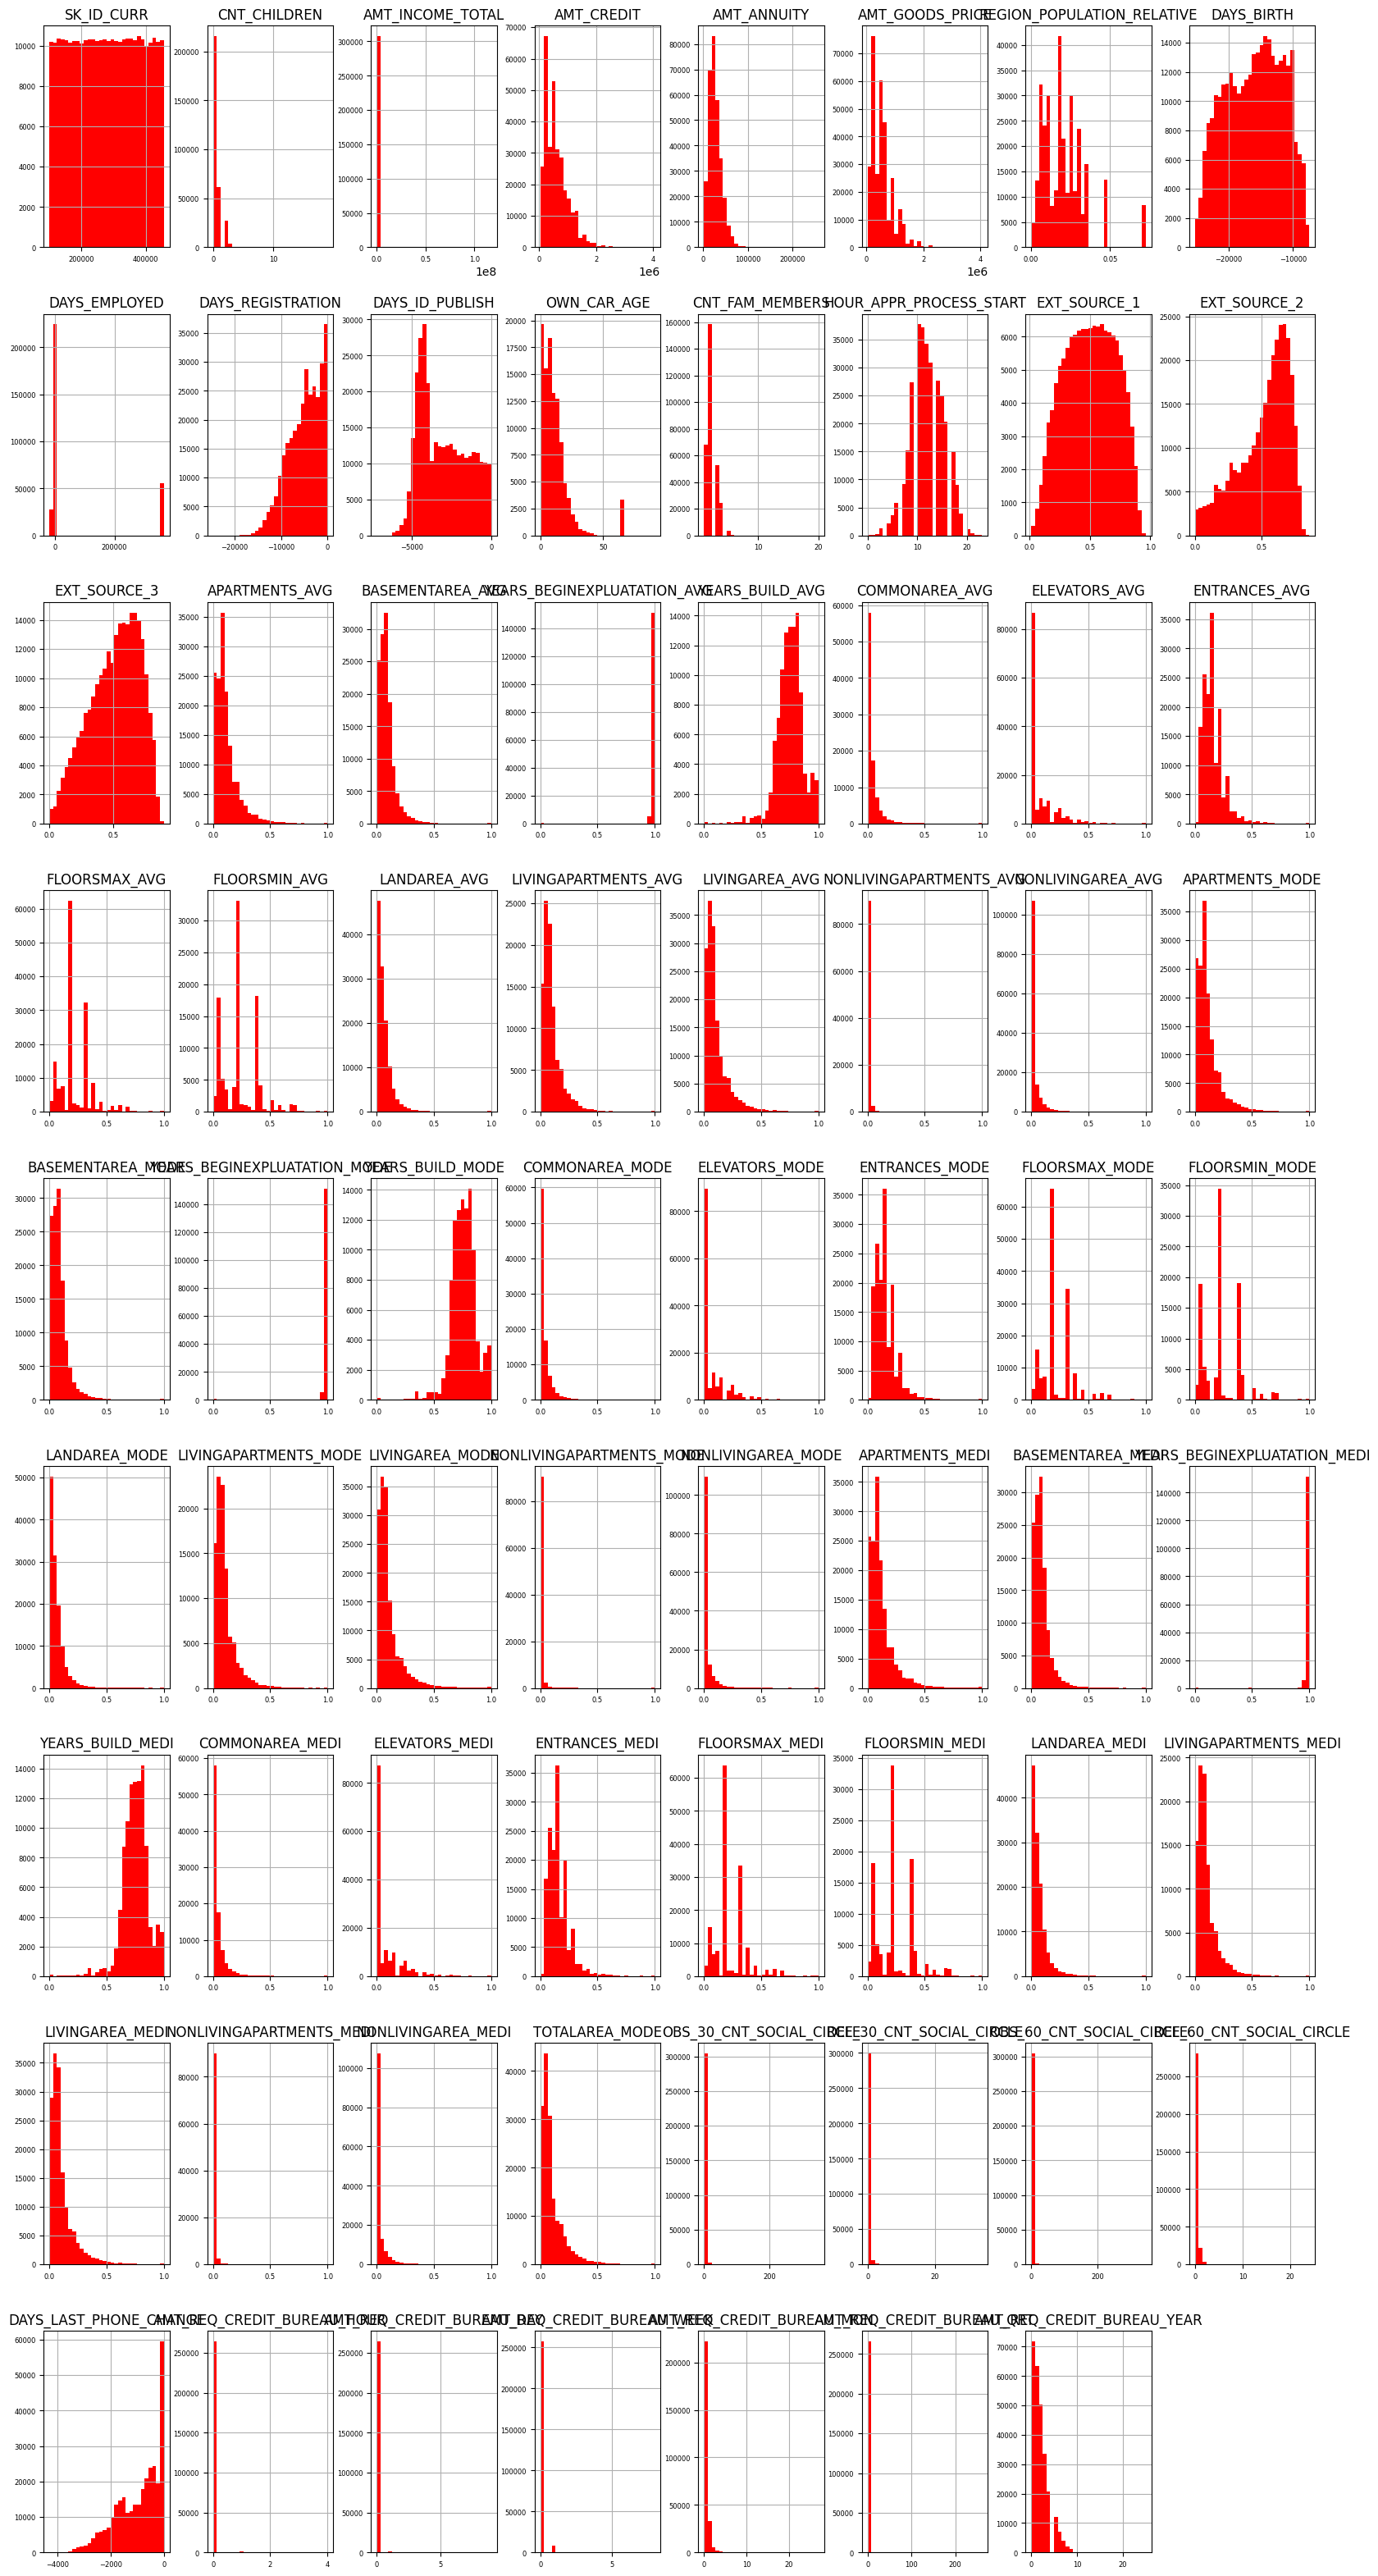

In [28]:
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
train[num_features].hist(figsize=(20, 40), color = 'r', bins=30, xlabelsize=6, ylabelsize=6)

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>],
       [<Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>],
       [<Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>,
      

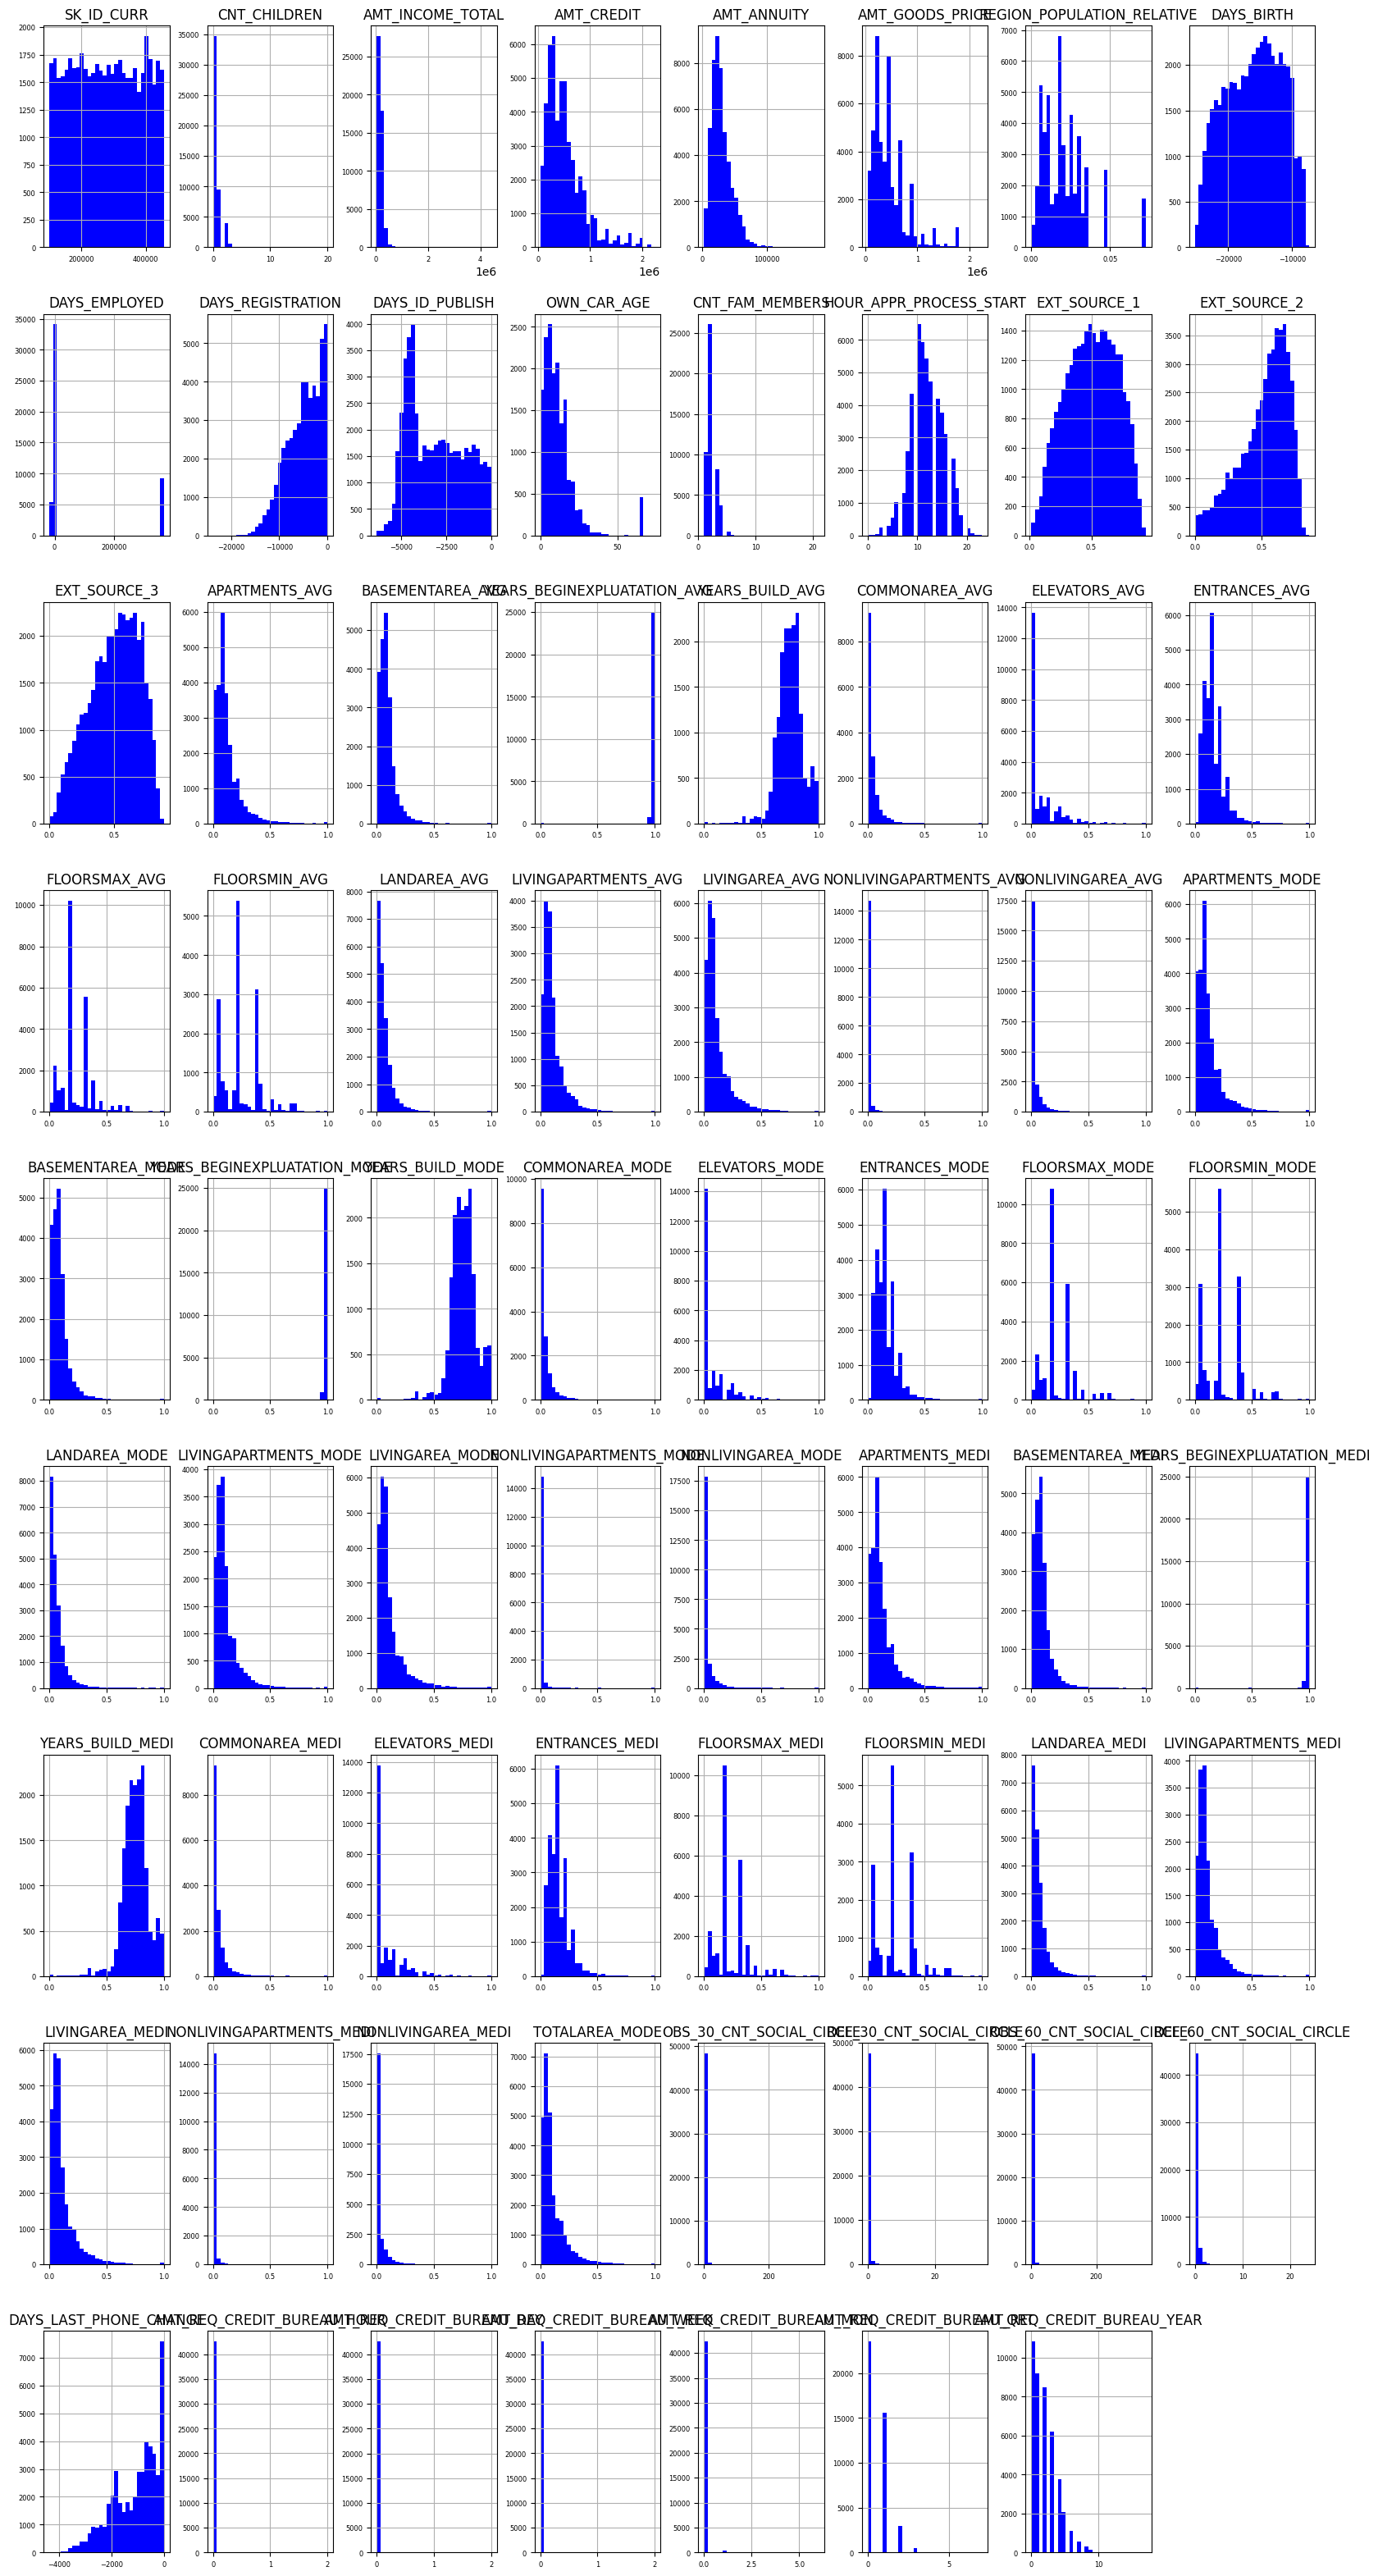

In [29]:
test[num_features].hist(figsize=(20, 40), color = 'b', bins=30, xlabelsize=6, ylabelsize=6)

In [30]:
## Outliers

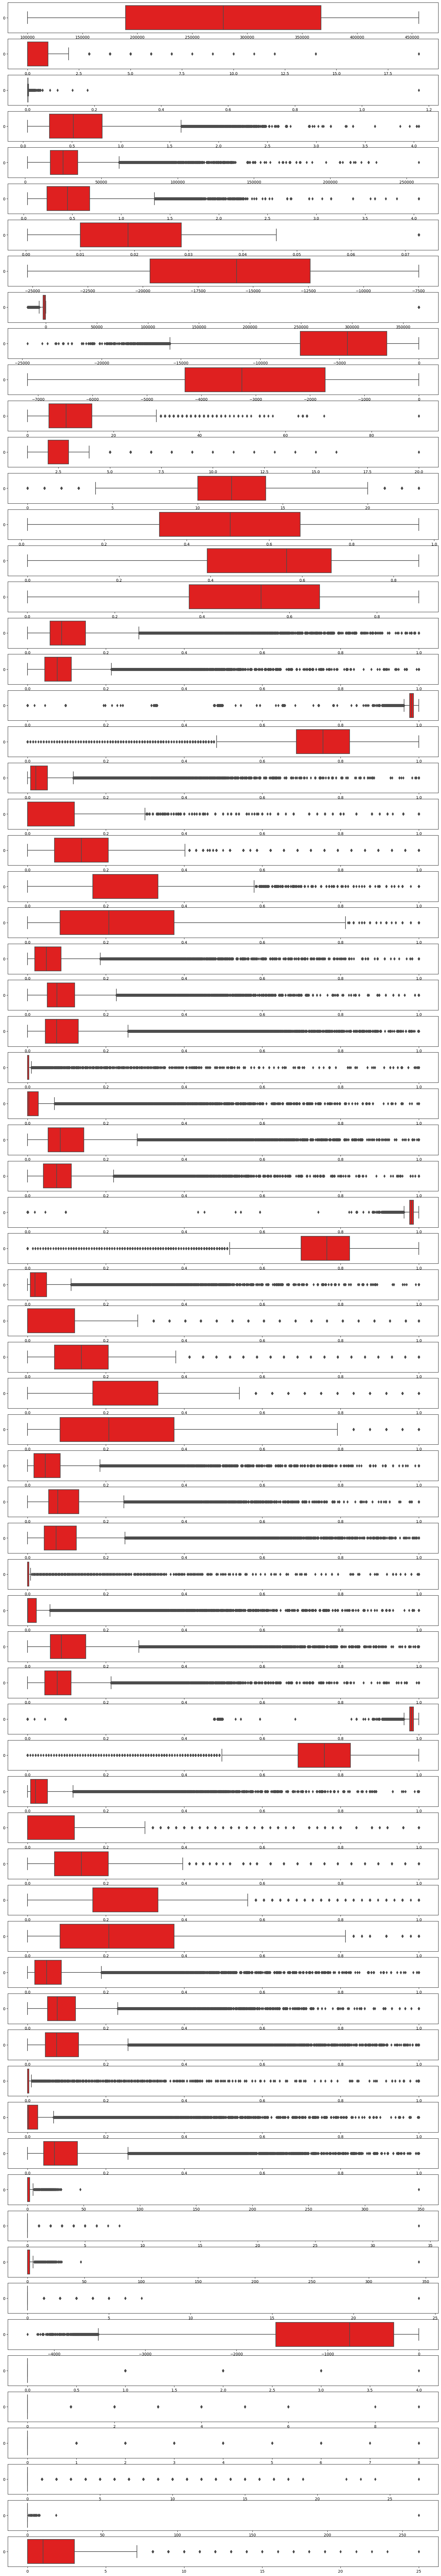

In [31]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=train[col], orient='h', ax=axes[i], color='r')
plt.show()

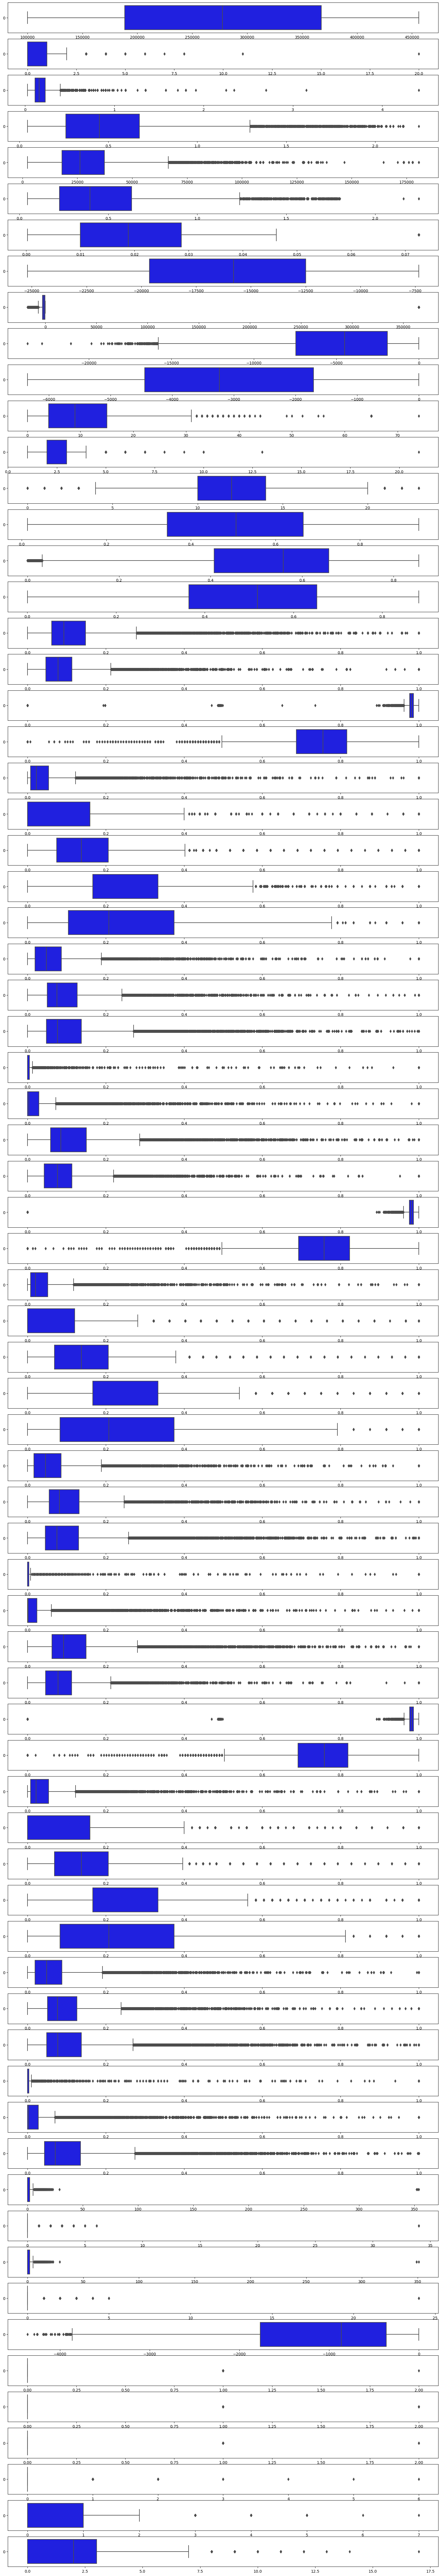

In [32]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=test[col], orient='h', ax=axes[i], color='b')
plt.show()

In [33]:
## Матриця кореляції

In [34]:
corrMatrix = train.corr(numeric_only=True)
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

<Axes: >

In [35]:
## Підготовка даних

In [36]:
delete_cols =  { "CNT_CHILDREN", 
                      "LIVINGAPARTMENTS_AVG",
                      "APARTMENTS_MODE",
                      "BASEMENTAREA_MODE",
                      "YEARS_BEGINEXPLUATATION_MODE",
                      "YEARS_BUILD_MODE",
                      "COMMONAREA_MODE",
                      "ELEVATORS_MODE",
                      "ENTRANCES_MODE",
                      "FLOORSMAX_MODE",
                      "FLOORSMIN_MODE",
                      "LANDAREA_MODE",
                      "LIVINGAPARTMENTS_MODE",
                      "LIVINGAREA_MODE",
                      "NONLIVINGAPARTMENTS_MODE",
                      "NONLIVINGAREA_MODE",
                      "APARTMENTS_MEDI",
                      "BASEMENTAREA_MEDI",
                      "YEARS_BEGINEXPLUATATION_MEDI",
                      "YEARS_BUILD_MEDI",
                      "COMMONAREA_MEDI",
                      "ELEVATORS_MEDI",
                      "ENTRANCES_MEDI",
                      "FLOORSMAX_MEDI",
                      "FLOORSMIN_MEDI",
                      "LANDAREA_MEDI",
                      "LIVINGAPARTMENTS_MEDI",
                      "LIVINGAREA_MEDI",
                      "NONLIVINGAPARTMENTS_MEDI",
                      "NONLIVINGAREA_MEDI",
                      "TOTALAREA_MODE",
                      "AMT_GOODS_PRICE",
                      "AMT_ANNUITY",
                      "ELEVATORS_AVG",
                      "APARTMENTS_AVG",
                      "BASEMENTAREA_AVG",
                      "OBS_30_CNT_SOCIAL_CIRCLE",
                      "DEF_30_CNT_SOCIAL_CIRCLE",
                      "LIVINGAREA_AVG"
                     }
for d in delete_cols:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)
    
num_features = train.select_dtypes(include = ['float64', 'int64']).columns

In [37]:
train.drop("FLOORSMIN_AVG", inplace=True, axis=1)
test.drop("FLOORSMIN_AVG", inplace=True, axis=1)
num_features = train.select_dtypes(include = ['float64', 'int64']).columns

In [38]:
## Обробка пропущених значень

In [39]:
print(train[num_features].isnull().sum()) 

SK_ID_CURR                          0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
CNT_FAM_MEMBERS                     2
HOUR_APPR_PROCESS_START             0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
LANDAREA_AVG                   182590
NONLIVINGAPARTMENTS_AVG        213514
NONLIVINGAREA_AVG              169682
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CRED

In [40]:
print(test[num_features].isnull().sum())

SK_ID_CURR                         0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                    32312
CNT_FAM_MEMBERS                    0
HOUR_APPR_PROCESS_START            0
EXT_SOURCE_1                   20532
EXT_SOURCE_2                       8
EXT_SOURCE_3                    8668
YEARS_BEGINEXPLUATATION_AVG    22856
YEARS_BUILD_AVG                31818
COMMONAREA_AVG                 33495
ENTRANCES_AVG                  23579
FLOORSMAX_AVG                  23321
LANDAREA_AVG                   28254
NONLIVINGAPARTMENTS_AVG        33347
NONLIVINGAREA_AVG              26084
OBS_60_CNT_SOCIAL_CIRCLE          29
DEF_60_CNT_SOCIAL_CIRCLE          29
DAYS_LAST_PHONE_CHANGE             0
AMT_REQ_CREDIT_BUREAU_HOUR      6049
AMT_REQ_CREDIT_BUREAU_DAY       6049
A

In [41]:
col_del_candidate = { 'CNT_FAM_MEMBERS',  
                      'DAYS_LAST_PHONE_CHANGE'
                    }

train = train.dropna(subset=col_del_candidate)
train.fillna((train.median(numeric_only=True)), inplace=True)

test = test.dropna(subset=col_del_candidate)
test.fillna((test.median(numeric_only=True)), inplace=True)

In [42]:
print(train[cat_features].isnull().sum()) 

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1290
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96390
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_2                    0
F

In [43]:
print(test[cat_features].isnull().sum()) 

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                  911
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                15605
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_2                    0
F

In [44]:
## Нові типи категоріальних колонок

In [45]:
cat_to_add = { 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE' }
for c in cat_to_add:
    train[c] = train[c].cat.add_categories('Unkown')
    train[c].fillna("Unkown")
    test[c] = test[c].cat.add_categories('Unkown')
    test[c].fillna("Unkown")

In [46]:
## Видалення деяких категоріальних атрибутів

In [54]:
cat_del_candidate = { "FLAG_MOBIL", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_7", 
                               "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_9","FLAG_DOCUMENT_12", 
                               "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_17", 
                               "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_20",
                              "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_4",
                              "FLAG_DOCUMENT_6", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_18",
                              "OCCUPATION_TYPE", "ORGANIZATION_TYPE", 
                              "WEEKDAY_APPR_PROCESS_START", "CODE_GENDER",
                              'NAME_TYPE_SUITE', 
                              'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'REG_REGION_NOT_WORK_REGION', 
                               'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 
                               'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE' }
for d in cat_del_candidate:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)

In [57]:
cat_features = list(set(cat_features) - cat_del_candidate)
train[cat_features].describe()

LIVE_REGION_NOT_WORK_REGION  FLAG_EMP_PHONE  LIVE_CITY_NOT_WORK_CITY   
count                        307508          307508                   307508  \
unique                            2               2                        2   
top                               0               1                        0   
freq                         295006          252122                   252294   

        FLAG_PHONE  FLAG_DOCUMENT_8  FLAG_EMAIL  REG_CITY_NOT_WORK_CITY   
count       307508           307508      307508                  307508  \
unique           2                2           2                       2   
top              0                0           0                       0   
freq        221078           282485      290066                  236642   

        REGION_RATING_CLIENT  FLAG_WORK_PHONE NAME_CONTRACT_TYPE   
count                 307508           307508             307508  \
unique                     3                2                  2   
top                        2                0         Cash loans   
freq                  226981           246201             278231   

        REG_CITY_NOT_LIVE_CITY FLAG_OWN_REALTY            NAME_EDUCATION_TYPE   
count                   307508          307508                         307508  \
unique                       2               2                              5   
top                          0               Y  Secondary / secondary special   
freq                    283469          213309                         218391   

        FLAG_DOCUMENT_3 FLAG_OWN_CAR  
count            307508       307508  
unique                2            2  
top                   1            N  
freq             218340       202922

In [58]:
## One-Hot кодування

In [60]:
one_hot_enc = [ "NAME_CONTRACT_TYPE", "FLAG_EMP_PHONE", 'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR', 
                          'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 
                          'LIVE_CITY_NOT_WORK_CITY', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_3', 'FLAG_PHONE', 
                          'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT']
train = pd.get_dummies(train, columns=one_hot_enc, prefix = one_hot_enc)
test = pd.get_dummies(test, columns=one_hot_enc, prefix = one_hot_enc)

In [ ]:
## Label encoding для NAME_EDUCATION_TYPE

In [61]:
train['NAME_EDUCATION_TYPE'] = train['NAME_EDUCATION_TYPE'].cat.codes
test['NAME_EDUCATION_TYPE'] = test['NAME_EDUCATION_TYPE'].cat.codes

In [62]:
train.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE   
count  307508.000000      3.075080e+05  3.075080e+05        307508.000000  \
mean   278181.332947      1.687970e+05  5.990268e+05             3.188285   
std    102789.982905      2.371237e+05  4.024923e+05             1.298752   
min    100002.000000      2.565000e+04  4.500000e+04             0.000000   
25%    189146.750000      1.125000e+05  2.700000e+05             2.000000   
50%    278202.500000      1.471500e+05  5.135310e+05             4.000000   
75%    367143.250000      2.025000e+05  8.086500e+05             4.000000   
max    456255.000000      1.170000e+08  4.050000e+06             4.000000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED   
count               307508.000000  307508.000000  307508.000000  \
mean                     0.020868  -16037.041560   63815.673956   
std                      0.013831    4363.980429  141276.312547   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1214.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  ...   
count      307508.000000    307508.000000  307508.000000  ...  \
mean        -4986.137584     -2994.208382      10.041023  ...   
std          3522.896819      1509.449226       7.115235  ...   
min        -24672.000000     -7197.000000       0.000000  ...   
25%         -7480.000000     -4299.000000       9.000000  ...   
50%         -4504.000000     -3254.000000       9.000000  ...   
75%         -2010.000000     -1720.000000       9.000000  ...   
max             0.000000         0.000000      91.000000  ...   

       NONLIVINGAREA_AVG  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE   
count      307508.000000             307508.000000             307508.000000  \
mean            0.014697                  1.400627                  0.099718   
std             0.048146                  2.377233                  0.361736   
min             0.000000                  0.000000                  0.000000   
25%             0.003600                  0.000000                  0.000000   
50%             0.003600                  0.000000                  0.000000   
75%             0.003600                  2.000000                  0.000000   
max             1.000000                344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR   
count           307508.000000               307508.000000  \
mean              -962.860075                    0.005538   
std                826.810973                    0.078015   
min              -4292.000000                    0.000000   
25%              -1570.000000                    0.000000   
50%               -757.000000                    0.000000   
75%               -274.000000                    0.000000   
max                  0.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
count              307508.000000               307508.000000  \
mean                    0.006055                    0.029723   
std                     0.103038                    0.190729   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT   
count              307508.000000              307508.000000  \
mean                    0.231295                   0.229633   
std                     0.856814                   0.744062   
min                     0.

In [63]:
test.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE   
count   48744.000000      4.874400e+04  4.874400e+04         48744.000000  \
mean   277796.676350      1.784318e+05  5.167404e+05             3.145844   
std    103169.547296      1.015226e+05  3.653970e+05             1.321386   
min    100001.000000      2.694150e+04  4.500000e+04             0.000000   
25%    188557.750000      1.125000e+05  2.606400e+05             1.000000   
50%    277549.000000      1.575000e+05  4.500000e+05             4.000000   
75%    367555.500000      2.250000e+05  6.750000e+05             4.000000   
max    456250.000000      4.410000e+06  2.245500e+06             4.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED   
count                48744.000000  48744.000000   48744.000000  \
mean                     0.021226 -16068.084605   67485.366322   
std                      0.014428   4325.900393  144348.507136   
min                      0.000253 -25195.000000  -17463.000000   
25%                      0.010006 -19637.000000   -2910.000000   
50%                      0.018850 -15785.000000   -1293.000000   
75%                      0.028663 -12496.000000    -296.000000   
max                      0.072508  -7338.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE  ...   
count       48744.000000     48744.000000  48744.000000  ...  \
mean        -4967.652716     -3051.712949      9.939193  ...   
std          3552.612035      1569.276709      6.784398  ...   
min        -23722.000000     -6348.000000      0.000000  ...   
25%         -7459.250000     -4448.000000      9.000000  ...   
50%         -4490.000000     -3234.000000      9.000000  ...   
75%         -1901.000000     -1706.000000      9.000000  ...   
max             0.000000         0.000000     74.000000  ...   

       NONLIVINGAREA_AVG  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE   
count       48744.000000              48744.000000              48744.000000  \
mean            0.015695                  1.434884                  0.101079   
std             0.050727                  3.579231                  0.403679   
min             0.000000                  0.000000                  0.000000   
25%             0.003800                  0.000000                  0.000000   
50%             0.003800                  0.000000                  0.000000   
75%             0.003800                  2.000000                  0.000000   
max             1.000000                351.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR   
count            48744.000000                48744.000000  \
mean             -1077.766228                    0.001846   
std                878.920740                    0.043406   
min              -4361.000000                    0.000000   
25%              -1766.250000                    0.000000   
50%               -863.000000                    0.000000   
75%               -363.000000                    0.000000   
max                  0.000000                    2.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
count               48744.000000                48744.000000  \
mean                    0.001580                    0.002441   
std                     0.043179                    0.050582   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     2.000000                    2.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT   
count               48744.000000               48744.000000  \
mean                    0.008145                   0.479033   
std                     0.103858                   0.673449   
min                     0.000000            

In [ ]:
## Нові розподіли

In [64]:
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
num_features_test = test.select_dtypes(include = ['float64', 'int64']).columns

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>],
       [<Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>],
       [<Axes: title={'center': 'FLOORSMAX

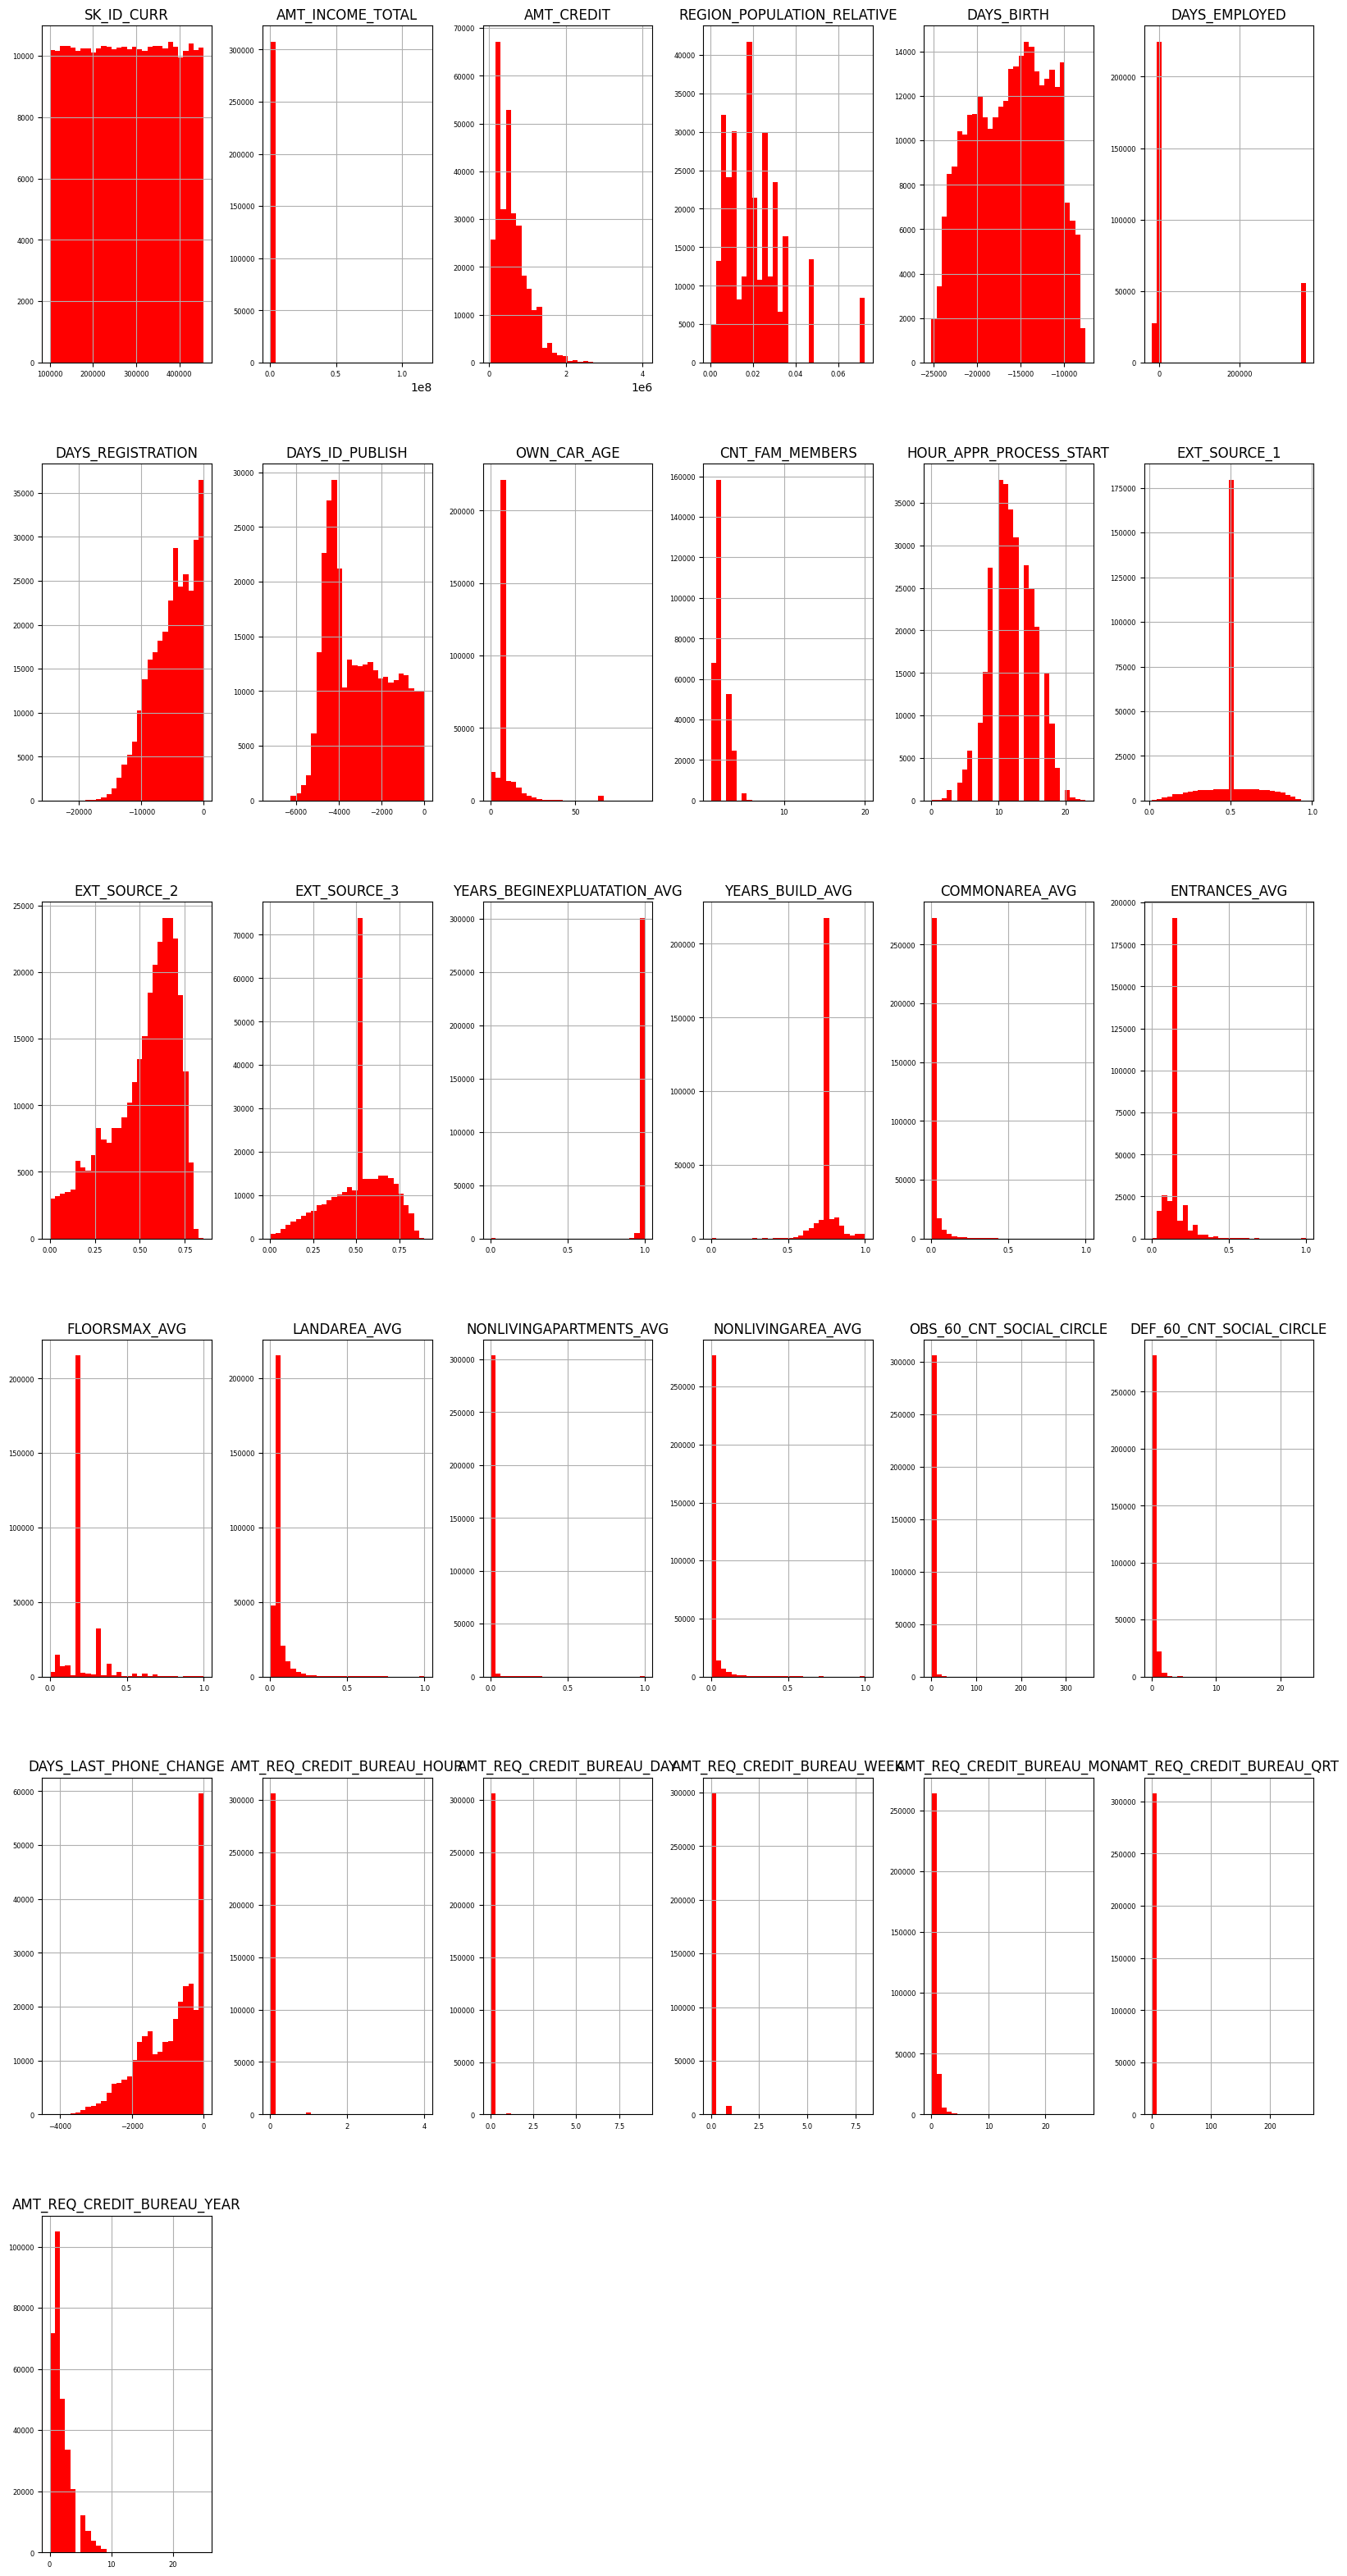

In [65]:
train[num_features].hist(figsize=(20, 40), color = 'r', bins=30, xlabelsize=6, ylabelsize=6)

array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'HOUR_APPR_PROCESS_START'}>,
        <Axes: title={'center': 'EXT_SOURCE_1'}>],
       [<Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>,
        <Axes: title={'center': 'ENTRANCES_AVG'}>],
       [<Axes: title={'center': 'FLOORSMAX

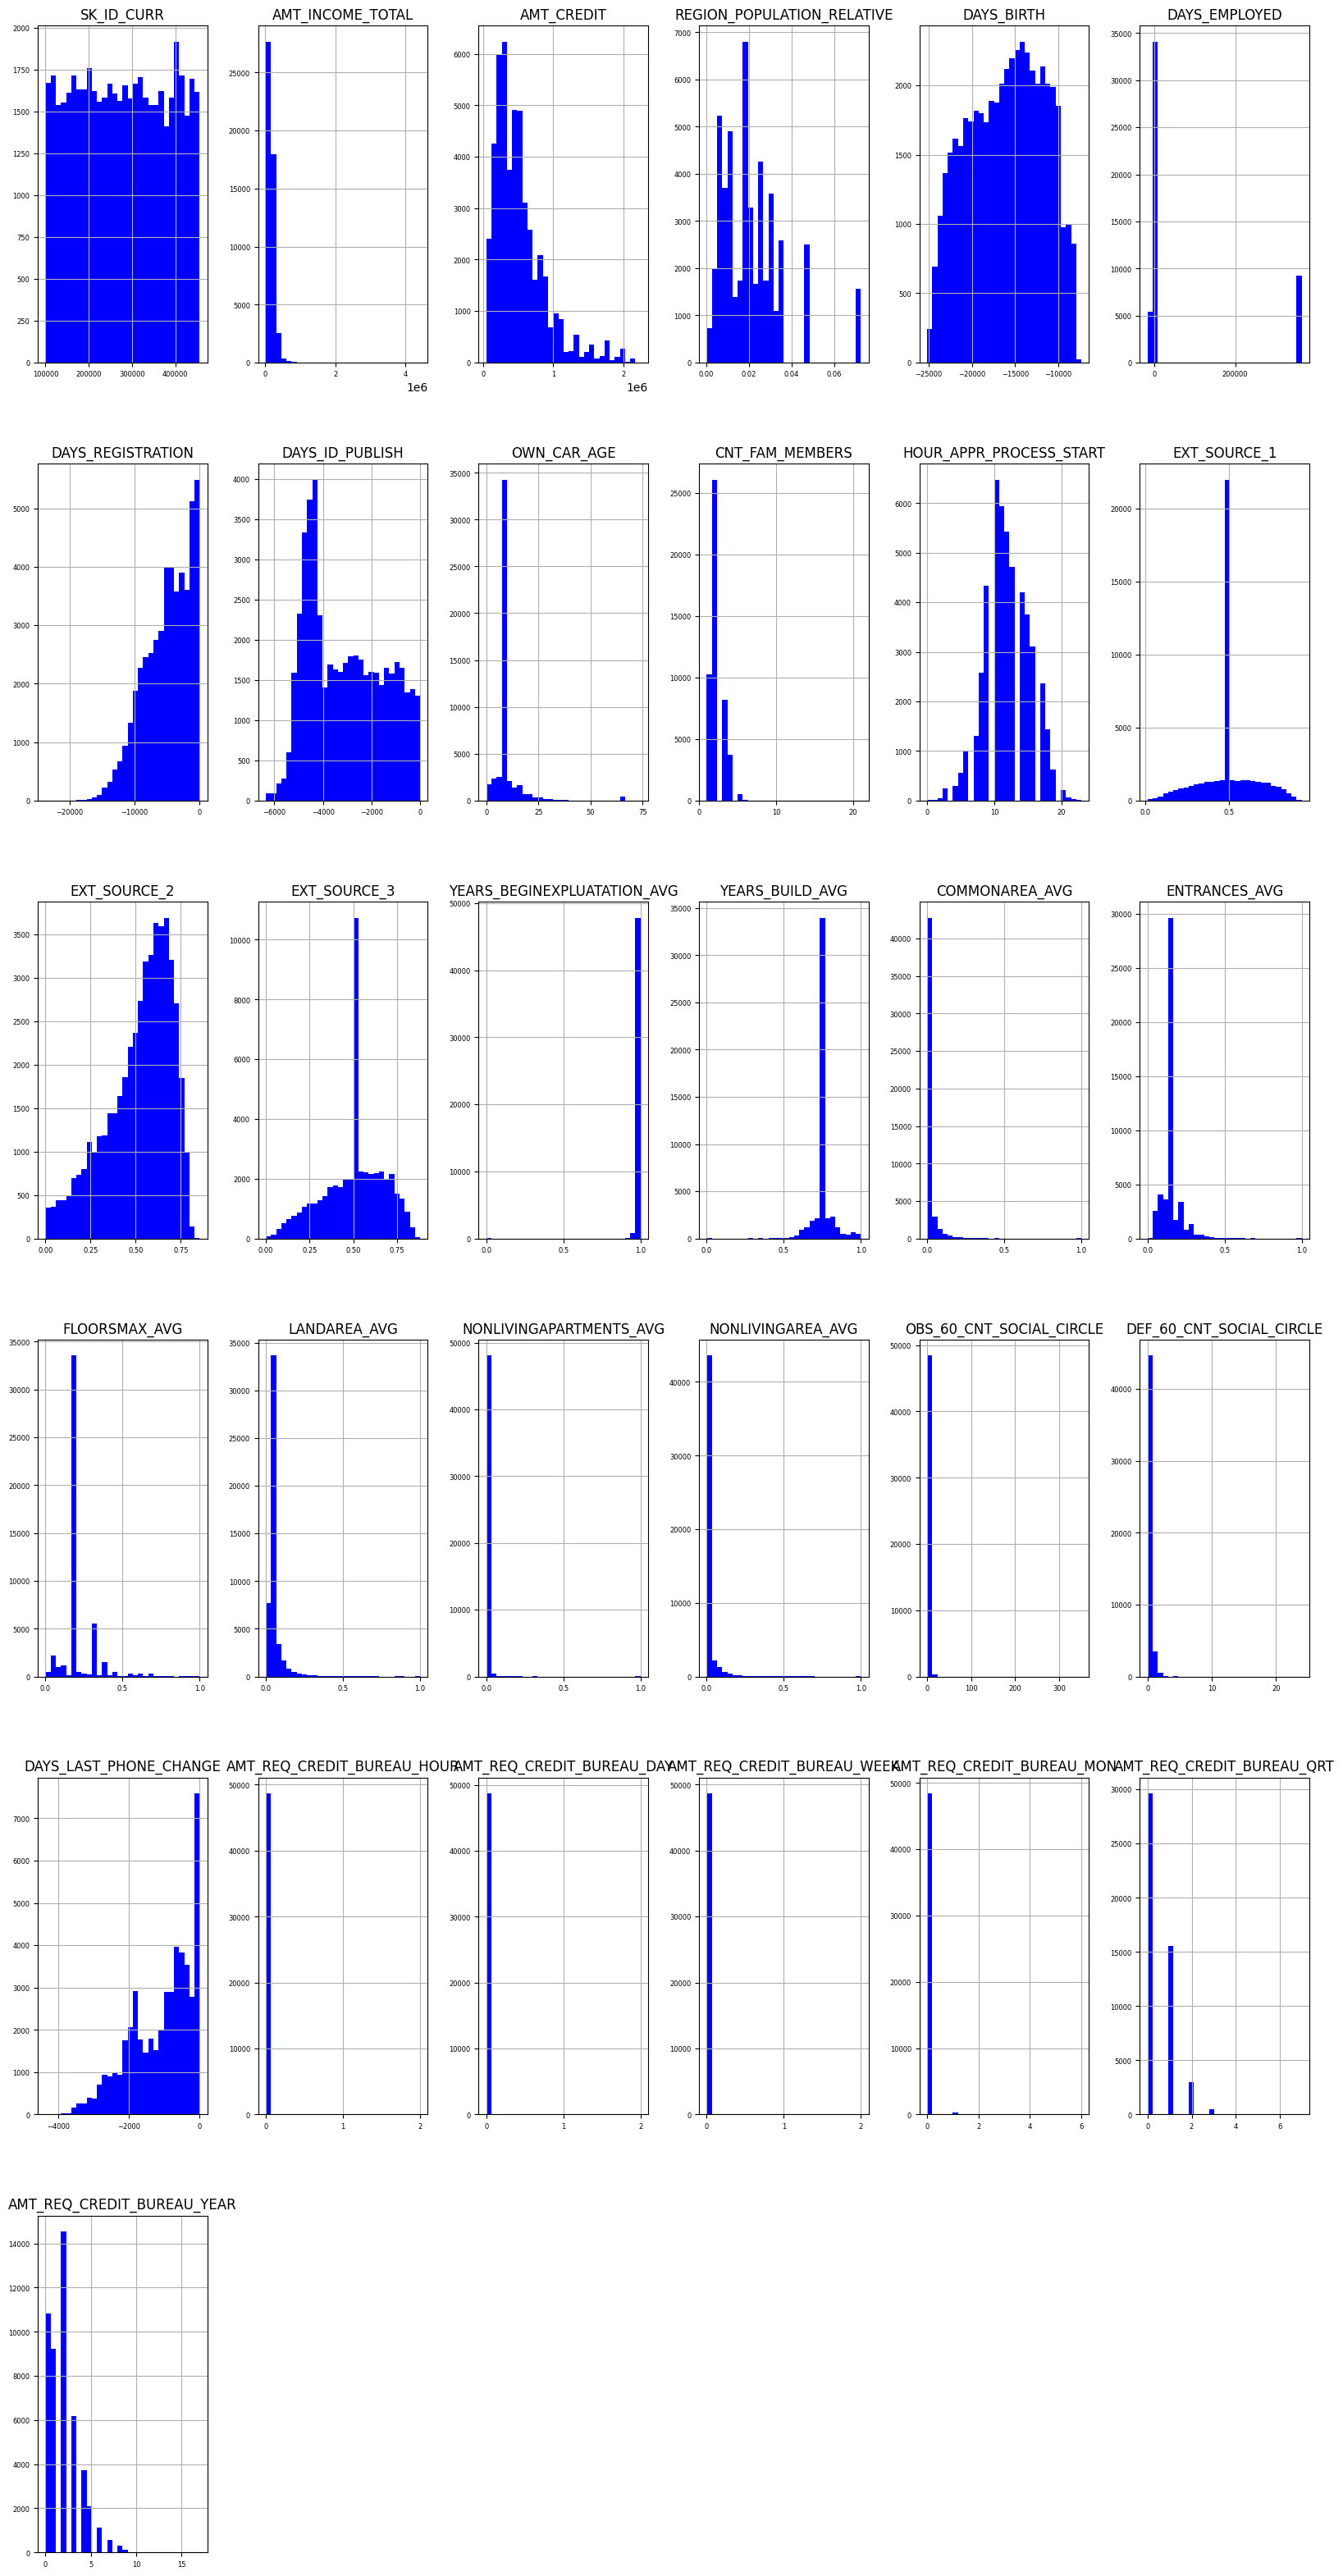

In [66]:
test[num_features_test].hist(figsize=(20, 40), color = 'b', bins=30, xlabelsize=6, ylabelsize=6)

In [67]:
## видалення невалідних атрибутів

In [68]:
num_del_candidate = ["NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "OBS_60_CNT_SOCIAL_CIRCLE", 
                               "DEF_60_CNT_SOCIAL_CIRCLE", "YEARS_BEGINEXPLUATATION_AVG","AMT_REQ_CREDIT_BUREAU_HOUR", 
                               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT"]
for d in num_del_candidate:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)

In [69]:
train.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE   
count  307508.000000      3.075080e+05  3.075080e+05        307508.000000  \
mean   278181.332947      1.687970e+05  5.990268e+05             3.188285   
std    102789.982905      2.371237e+05  4.024923e+05             1.298752   
min    100002.000000      2.565000e+04  4.500000e+04             0.000000   
25%    189146.750000      1.125000e+05  2.700000e+05             2.000000   
50%    278202.500000      1.471500e+05  5.135310e+05             4.000000   
75%    367143.250000      2.025000e+05  8.086500e+05             4.000000   
max    456255.000000      1.170000e+08  4.050000e+06             4.000000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED   
count               307508.000000  307508.000000  307508.000000  \
mean                     0.020868  -16037.041560   63815.673956   
std                      0.013831    4363.980429  141276.312547   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1214.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  ...  EXT_SOURCE_2   
count      307508.000000    307508.000000  307508.000000  ...  3.075080e+05  \
mean        -4986.137584     -2994.208382      10.041023  ...  5.145022e-01   
std          3522.896819      1509.449226       7.115235  ...  1.908704e-01   
min        -24672.000000     -7197.000000       0.000000  ...  8.173617e-08   
25%         -7480.000000     -4299.000000       9.000000  ...  3.929737e-01   
50%         -4504.000000     -3254.000000       9.000000  ...  5.659614e-01   
75%         -2010.000000     -1720.000000       9.000000  ...  6.634218e-01   
max             0.000000         0.000000      91.000000  ...  8.549997e-01   

        EXT_SOURCE_3  YEARS_BUILD_AVG  COMMONAREA_AVG  ENTRANCES_AVG   
count  307508.000000    307508.000000   307508.000000  307508.000000  \
mean        0.515694         0.754285        0.028186       0.143771   
std         0.174736         0.065579        0.043108       0.070746   
min         0.000527         0.000000        0.000000       0.000000   
25%         0.417100         0.755200        0.021100       0.137900   
50%         0.535276         0.755200        0.021100       0.137900   
75%         0.636376         0.755200        0.021100       0.137900   
max         0.896010         1.000000        1.000000       1.000000   

       FLOORSMAX_AVG   LANDAREA_AVG  DAYS_LAST_PHONE_CHANGE   
count  307508.000000  307508.000000           307508.000000  \
mean        0.196632       0.055507             -962.860075   
std         0.106761       0.052513              826.810973   
min         0.000000       0.000000            -4292.000000   
25%         0.166700       0.048100            -1570.000000   
50%         0.166700       0.048100             -757.000000   
75%         0.166700       0.048100             -274.000000   
max         1.000000       1.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307508.000000               307508.000000  
mean                    0.231295                    1.778471  
std                     0.856814                    1.765530  
min                     0.000000                    0.000000  
25%                     0.000000                    1.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                    27.000000                   25.000000  

[8 rows x 23 columns]

In [70]:
test.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT  NAME_EDUCATION_TYPE   
count   48744.000000      4.874400e+04  4.874400e+04         48744.000000  \
mean   277796.676350      1.784318e+05  5.167404e+05             3.145844   
std    103169.547296      1.015226e+05  3.653970e+05             1.321386   
min    100001.000000      2.694150e+04  4.500000e+04             0.000000   
25%    188557.750000      1.125000e+05  2.606400e+05             1.000000   
50%    277549.000000      1.575000e+05  4.500000e+05             4.000000   
75%    367555.500000      2.250000e+05  6.750000e+05             4.000000   
max    456250.000000      4.410000e+06  2.245500e+06             4.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED   
count                48744.000000  48744.000000   48744.000000  \
mean                     0.021226 -16068.084605   67485.366322   
std                      0.014428   4325.900393  144348.507136   
min                      0.000253 -25195.000000  -17463.000000   
25%                      0.010006 -19637.000000   -2910.000000   
50%                      0.018850 -15785.000000   -1293.000000   
75%                      0.028663 -12496.000000    -296.000000   
max                      0.072508  -7338.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE  ...  EXT_SOURCE_2   
count       48744.000000     48744.000000  48744.000000  ...  48744.000000  \
mean        -4967.652716     -3051.712949      9.939193  ...      0.518028   
std          3552.612035      1569.276709      6.784398  ...      0.181264   
min        -23722.000000     -6348.000000      0.000000  ...      0.000008   
25%         -7459.250000     -4448.000000      9.000000  ...      0.408082   
50%         -4490.000000     -3234.000000      9.000000  ...      0.558758   
75%         -1901.000000     -1706.000000      9.000000  ...      0.658480   
max             0.000000         0.000000     74.000000  ...      0.855000   

       EXT_SOURCE_3  YEARS_BUILD_AVG  COMMONAREA_AVG  ENTRANCES_AVG   
count  48744.000000     48744.000000    48744.000000   48744.000000  \
mean       0.503483         0.753789        0.030497       0.145064   
std        0.171978         0.066726        0.047768       0.072663   
min        0.000527         0.000000        0.000000       0.000000   
25%        0.399676         0.755200        0.022700       0.137900   
50%        0.519097         0.755200        0.022700       0.137900   
75%        0.624615         0.755200        0.022700       0.137900   
max        0.882530         1.000000        1.000000       1.000000   

       FLOORSMAX_AVG  LANDAREA_AVG  DAYS_LAST_PHONE_CHANGE   
count   48744.000000  48744.000000            48744.000000  \
mean        0.201648      0.056241            -1077.766228   
std         0.111562      0.053918              878.920740   
min         0.000000      0.000000            -4361.000000   
25%         0.166700      0.048300            -1766.250000   
50%         0.166700      0.048300             -863.000000   
75%         0.166700      0.048300             -363.000000   
max         1.000000      1.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR  
count               48744.000000                48744.000000  
mean                    0.008145                    1.985783  
std                     0.103858                    1.721001  
min                     0.000000                    0.000000  
25%                     0.000000                    1.000000  
50%                     0.000000                    2.000000  
75%                     0.000000                    3.000000  
max                     6.000000                   17.000000  

[8 rows x 23 columns]

In [74]:
## навчання

In [77]:
train["TARGET"] = train["TARGET"].astype("category")
num_features = train.select_dtypes(include = ['float64', 'int64', 'uint8']).columns

In [90]:
X_test = test[num_features]
X_train, X_val, y_train, y_val = train_test_split(train[num_features], train["TARGET"], test_size=0.25, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

predictionTrain = lr.predict_proba(X_train)[:, 1]
validate = lr.predict_proba(X_val)[:, 1]

In [97]:
lr = LogisticRegression(solver="newton-cg", random_state=0).fit(X_train, y_train)

### validation ROC_AUC
roc_auc_score(y_val, validate)

0.7219242982182797

In [92]:
### train data ROC_AUC
roc_auc_score(y_train, predictionTrain)

0.7237055275400353